# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras as K

In [2]:
import pickle
import gzip

# Load the MNIST dataset

The dataset is composed in three parts: training, validation and test. We can load each of them in a different variable with the following command. The file is also stored locally on the Tutorials website.

In [4]:
dataset = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(dataset,encoding='bytes')
dataset.close()

We define the one_hot encoding function that is able to convert the label that gives the correct digit into a vector of dimension 10.

In [10]:
n_categories = 10
def hot_enc(j):
    e = np.zeros([len(j),n_categories])
    e[range(len(j)),j]=1.
    return e

Each part of the dataset has two parts: the image and its correct classification. We save the images in a variable and the label in another variable. In order to apply the _crossentropy_ cost function, we apply one hot encoding to the labels, i.e. $3 \rightarrow (0,0,0,1,0,0,0,0,0,0)$.

In [15]:
training_in, training_out = training_data
training_out_HOT = hot_enc(training_out)
N_samples = len(training_in)

test_in, test_out = test_data
test_out_HOT = hot_enc(test_out)
N_test = len(test_in)

Number of pixel of the image. Since the images are squares, its square root is the width and height.

In [27]:
N_pixels = np.shape(training_in)[1]

# Define the neural network 

In [37]:
def create_net(eta):
    net = K.models.Sequential()
    net.add(K.layers.Dense(100,input_shape=(N_pixels,), activation='relu'))
    net.add(K.layers.GaussianDropout(0.1))
    net.add(K.layers.Dense(50,activation='relu'))
    net.add(K.layers.Dense(n_categories, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer=K.optimizers.SGD(lr=eta), metrics=['categorical_accuracy'])
    net.summary()
    return net

In [38]:
eta = 1.0
net = create_net(eta)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
gaussian_dropout_3 (Gaussian (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


# Train the network

In [39]:
costs = []
batchsize = 100
N_batches = int(N_samples/batchsize)-1

Keep in mind that we call _Epoch_ each time we go through the entire dataset. In other words, the code below trains the network for a single epoch.

In [44]:
for i in range(N_batches):
    costs.append(
        net.train_on_batch(training_in[i*batchsize:(i+1)*batchsize,:], 
                          training_out_HOT[i*batchsize:(i+1)*batchsize,:])[0]  #First output of train on batch is COST, second the METRIC
    )
    print("Training: %d/%d,\tCost = %2.7f" % (i,N_batches,costs[-1]))

Training: 0/499,	Cost = 0.2227561
Training: 1/499,	Cost = 0.2650533
Training: 2/499,	Cost = 0.2169061
Training: 3/499,	Cost = 0.0838285
Training: 4/499,	Cost = 0.1922266
Training: 5/499,	Cost = 0.2067805
Training: 6/499,	Cost = 0.2481104
Training: 7/499,	Cost = 0.2479007
Training: 8/499,	Cost = 0.2621571
Training: 9/499,	Cost = 0.3668781
Training: 10/499,	Cost = 0.4651476
Training: 11/499,	Cost = 0.4409310
Training: 12/499,	Cost = 0.3532189
Training: 13/499,	Cost = 0.3146908
Training: 14/499,	Cost = 0.2403073
Training: 15/499,	Cost = 0.2616359
Training: 16/499,	Cost = 0.2319023
Training: 17/499,	Cost = 0.2219260
Training: 18/499,	Cost = 0.1894606
Training: 19/499,	Cost = 0.2182457
Training: 20/499,	Cost = 0.3262188
Training: 21/499,	Cost = 0.2150277
Training: 22/499,	Cost = 0.1541584
Training: 23/499,	Cost = 0.1494135
Training: 24/499,	Cost = 0.1896083
Training: 25/499,	Cost = 0.1538988
Training: 26/499,	Cost = 0.2286618
Training: 27/499,	Cost = 0.3962154
Training: 28/499,	Cost = 0.242

Training: 256/499,	Cost = 0.2247756
Training: 257/499,	Cost = 0.2492800
Training: 258/499,	Cost = 0.1150653
Training: 259/499,	Cost = 0.1939035
Training: 260/499,	Cost = 0.1183121
Training: 261/499,	Cost = 0.1604333
Training: 262/499,	Cost = 0.1694030
Training: 263/499,	Cost = 0.3467530
Training: 264/499,	Cost = 0.1836167
Training: 265/499,	Cost = 0.3683804
Training: 266/499,	Cost = 0.3066223
Training: 267/499,	Cost = 0.3533469
Training: 268/499,	Cost = 0.3128729
Training: 269/499,	Cost = 0.1844331
Training: 270/499,	Cost = 0.1059487
Training: 271/499,	Cost = 0.5944105
Training: 272/499,	Cost = 0.3267230
Training: 273/499,	Cost = 0.1341233
Training: 274/499,	Cost = 0.2593476
Training: 275/499,	Cost = 0.1977710
Training: 276/499,	Cost = 0.2793771
Training: 277/499,	Cost = 0.2589239
Training: 278/499,	Cost = 0.2058689
Training: 279/499,	Cost = 0.2187088
Training: 280/499,	Cost = 0.0599507
Training: 281/499,	Cost = 0.1611224
Training: 282/499,	Cost = 0.2833387
Training: 283/499,	Cost = 0.

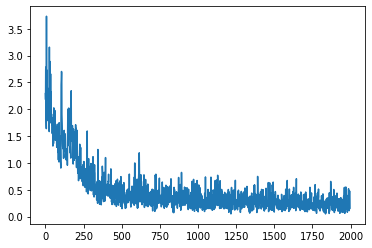

In [45]:
plt.plot(costs)

In [73]:
predictions = np.argmax(net.predict_on_batch(test_in),axis=1)
errors = np.count_nonzero(predictions- test_out)
accuracy = (1- errors/N_test)*100
print(accuracy)

93.11


# Show the digits

In [64]:
def show_image(which):
    plt.figure()
    plt.imshow(np.reshape(which,[28,28]), cmap='binary')
    plt.show()

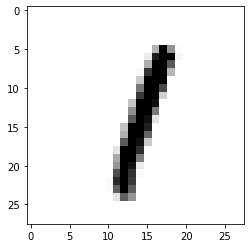

In [67]:
show_image(test_in[5])

Show the indices of the digits that were missclassified. You can look at them with the function `show_image(test_in[index])`, and get the proposed category with `predictions[index]`, if `index` is the index of the missclassified image.

In [70]:
np.where(predictions - test_out != 0)

(array([  33,   38,   62,  104,  124,  149,  151,  195,  217,  232,  233,
         241,  247,  259,  266,  290,  300,  321,  324,  340,  344,  352,
         362,  363,  381,  386,  391,  400,  403,  421,  435,  444,  445,
         449,  457,  479,  508,  511,  543,  550,  552,  565,  583,  591,
         610,  613,  619,  627,  630,  646,  658,  659,  691,  707,  717,
         720,  726,  740,  741,  786,  800,  839,  844,  870,  881,  882,
         924,  926,  930,  936,  938,  939,  947,  956,  959,  965,  992,
        1014, 1039, 1044, 1068, 1073, 1107, 1112, 1114, 1128, 1138, 1153,
        1159, 1166, 1182, 1191, 1192, 1194, 1198, 1200, 1202, 1208, 1212,
        1219, 1224, 1226, 1234, 1242, 1247, 1248, 1251, 1253, 1256, 1260,
        1283, 1292, 1299, 1319, 1325, 1326, 1328, 1337, 1357, 1391, 1413,
        1415, 1436, 1440, 1463, 1465, 1469, 1494, 1500, 1522, 1523, 1527,
        1530, 1549, 1553, 1559, 1562, 1587, 1609, 1626, 1634, 1640, 1641,
        1678, 1681, 1686, 1695, 1696, 

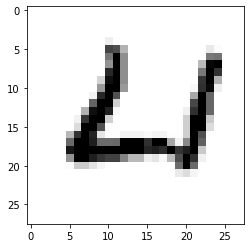

Proposed: 0
True: 4


In [72]:
show_image(test_in[33])
print("Proposed:", predictions[33])
print("True:", test_out[33])